# 수집 데이터 분석

## 뉴스 데이터

### 데이터 불러오기

In [1]:
import pandas as pd

news = pd.read_csv('news_DB.csv', encoding='utf-8-sig')
news.head()

,ID,기업명,종목명,종목코드,작성날짜,날짜,연분기,매체,제목,기사,기사_전처리,url
0,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,아이뉴스24,"82돌 대림, 새 사명 'DL'과 CI 공개…""글로벌 디벨로퍼 도약""",건설과 석유화학 기업분할 통해 산업별 특성에 맞는 개별 성장전략 추구DL CI. [...,건설과 석유화학 기업분할 통해 산업별 특성에 맞는 개별 성장전략 추구DL CI. ...,https://n.news.naver.com/mnews/article/031/000...
1,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,뉴시스,"대림, 내년 DL그룹으로 새 출발…계열사 CI 공개","지주회사 체제 전환 통해 글로벌 디벨로퍼 도약'혁신과 계승'…기업가치 재평가, 지배...","지주회사 체제 전환 통해 글로벌 디벨로퍼 도약'혁신과 계승'…기업가치 재평가, 지배...",https://n.news.naver.com/mnews/article/003/001...
2,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,스타뉴스,"82주년 맞이하는 DL, 새로운 사명과 CI 공개","[스타뉴스 채준 기자] /사진제공=dl새 출발하는 DL, 닻 올렸다!!! 내년 1월...","새 출발하는 DL, 닻 올렸다!!! 내년 1월 1일 공식 출범하는 대림이 그룹 명...",https://n.news.naver.com/mnews/article/108/000...
3,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,스타뉴스,"82주년 맞이하는 DL, 새로운 사명과 CI 공개","[스타뉴스 채준 기자] /사진제공=dl새 출발하는 DL, 닻 올렸다!!! 내년 1월...","새 출발하는 DL, 닻 올렸다!!! 내년 1월 1일 공식 출범하는 대림이 그룹 명...",https://n.news.naver.com/mnews/article/108/000...
4,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,스타뉴스,"82주년 맞이하는 DL, 새로운 사명과 CI 공개","[스타뉴스 채준 기자] /사진제공=dl새 출발하는 DL, 닻 올렸다!!! 내년 1월...","새 출발하는 DL, 닻 올렸다!!! 내년 1월 1일 공식 출범하는 대림이 그룹 명...",https://n.news.naver.com/mnews/article/108/000...


### 결측값 확인

In [2]:
# 본문 내용 없는 기사 포함됨
news = news.dropna()
news.isnull().sum()

ID        0
기업명       0
종목명       0
종목코드      0
작성날짜      0
날짜        0
연분기       0
매체        0
제목        0
기사        0
기사_전처리    0
url       0
dtype: int64

### 기업 별 뉴스 개수 확인

In [3]:
news.value_counts('기업명')

기업명
현대건설         8573
대우건설         4913
GS건설         4515
HDC현대산업개발    4025
HJ중공업        2908
DL이앤씨        2344
삼부토건         2326
DL건설         1664
동부건설         1605
금호건설         1161
한전KPS         632
코오롱글로벌        496
태영건설          479
신세계건설         330
서희건설          289
진흥기업          210
KCC건설         202
남광토건          194
한신공영          147
특수건설          103
신원종합개발         96
계룡건설산업         78
dtype: int64

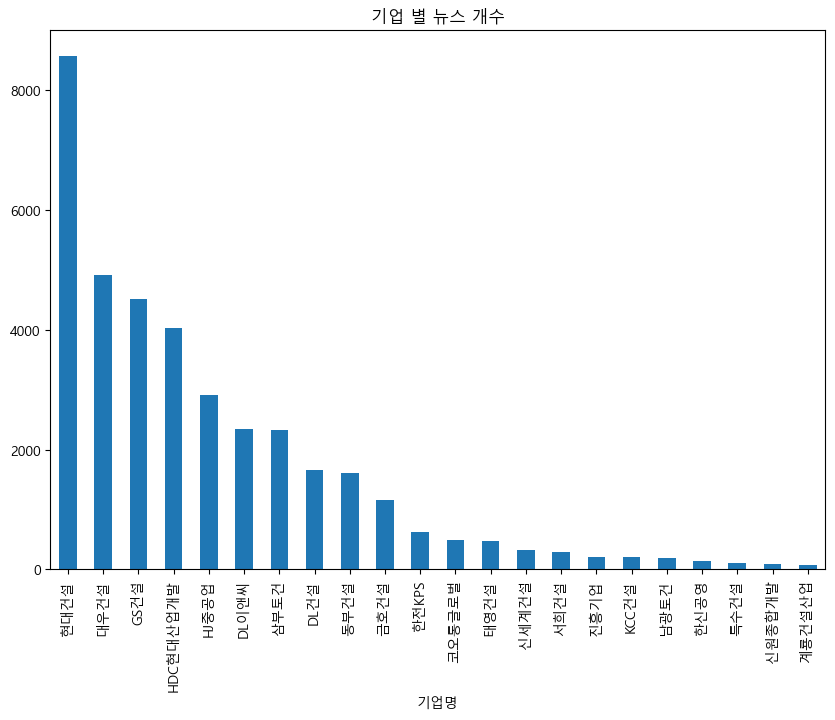

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(10, 7))

news.value_counts('기업명').plot.bar(0)

plt.title('기업 별 뉴스 개수')
plt.show()

### 매체별 뉴스 기사 수

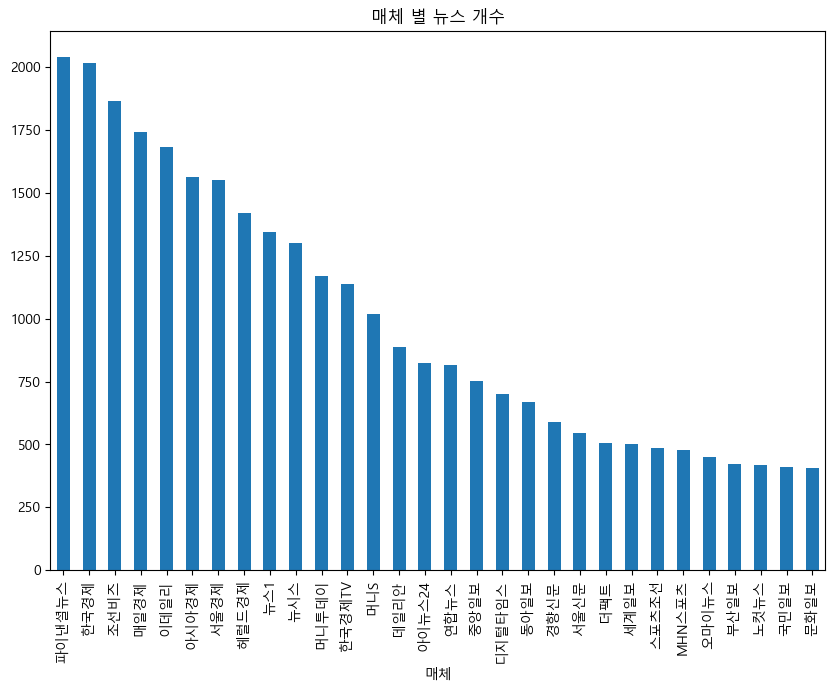

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(10, 7))
news.value_counts('매체')[:30].plot.bar()
plt.title('매체 별 뉴스 개수')
plt.show()

### 기업별 뉴스 개수 추이 (2020년-2022년)

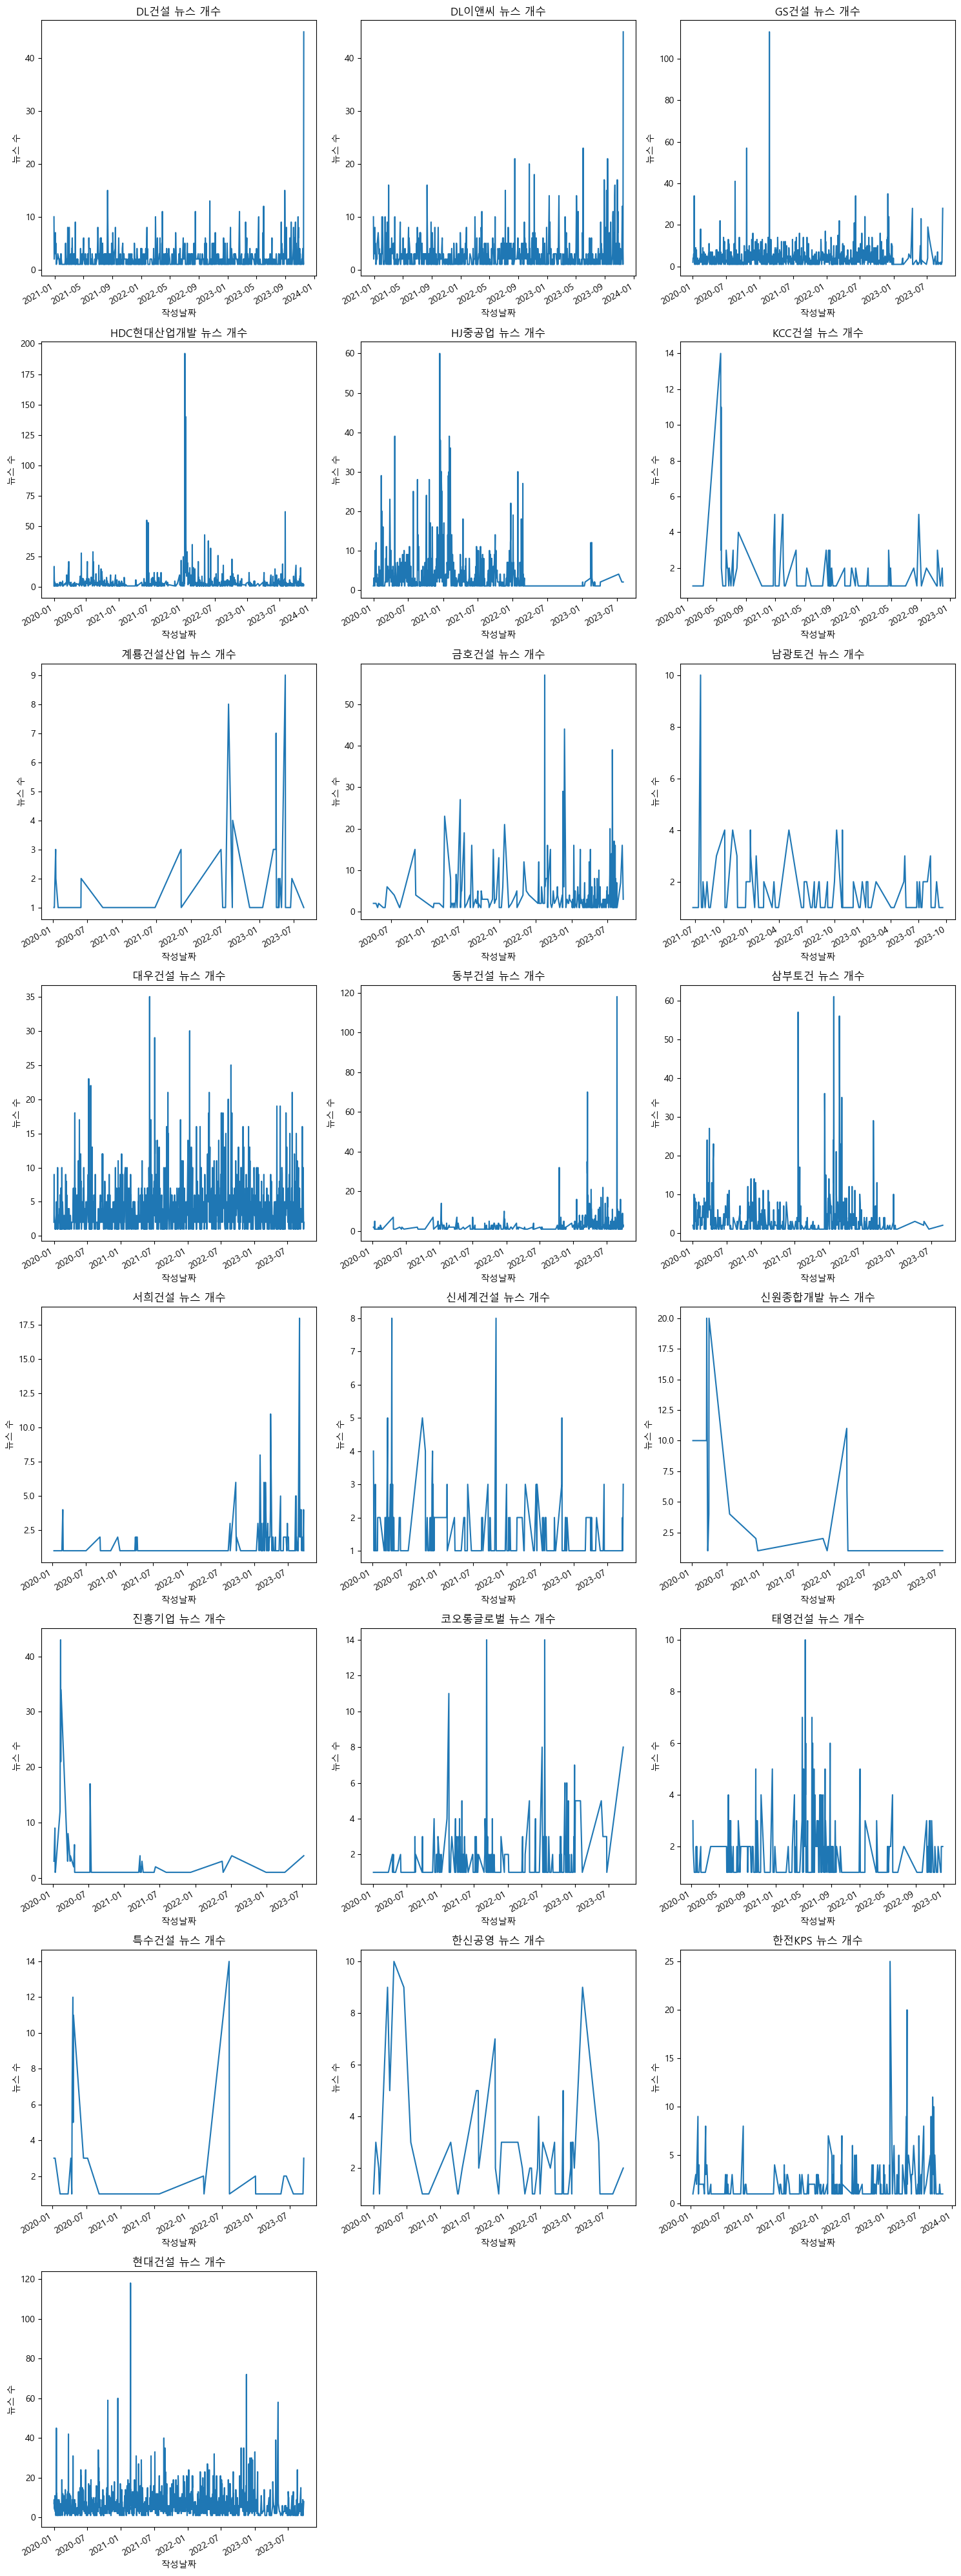

In [6]:
import matplotlib.pyplot as plt

news['작성날짜'] = pd.to_datetime(news['작성날짜'])

# 모든 회사 리스트 가져오기
companies = news['기업명'].unique()

# 열의 최대 개수 설정
max_columns = 3

# 행과 열의 개수 계산
num_rows = len(companies) // max_columns + (len(companies) % max_columns > 0)
num_columns = min(len(companies), max_columns)

# 그래프 생성
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# 회사 리스트를 순회하면서 각각의 그래프 생성
for i, company in enumerate(companies):
    # 현재 회사에 해당하는 데이터 필터링
    company_data = news[news['기업명'] == company]

    # 그래프를 현재 위치에 표시
    row_index = i // max_columns
    col_index = i % max_columns
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    # '작성날짜'에 따른 뉴스 빈도 플로팅
    company_data.value_counts('작성날짜').sort_index().plot(ax=ax, title=f'{company} 뉴스 개수')
    ax.set_xlabel('작성날짜')
    ax.set_ylabel('뉴스 수')

# 마지막 열의 빈 서브플롯 숨기기
for j in range(len(companies), num_rows * num_columns):
    axes.flatten()[j].axis('off')

# 그래프간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()


## 문장 데이터

### 데이터 불러오기

In [7]:
import pandas as pd

sentences = pd.read_csv('sentences_DB.csv', encoding='utf-8-sig')
sentences.head()

,ID,기업명,종목명,종목코드,작성날짜,날짜,연분기,매체,제목,url,문장,구분
0,C097230202104,HJ중공업,HJ중공업,97230,2021-12-21,2021-10-01,202104,파이낸셜뉴스,"한진중공업 찾은 박형준 시장 ""조선산업 인력·기술개발 적극 지원""",https://n.news.naver.com/mnews/article/014/000...,"새출발의 의미로 30여년 동안 사용한 사명을 'HJ중공업'으로 바꾸고, 상선건조 인...",G
1,C097230202104,HJ중공업,HJ중공업,97230,2021-12-22,2021-10-01,202104,연합뉴스,"32년 굴곡의 역사, 한진중공업 간판 내리다",https://n.news.naver.com/mnews/article/001/001...,2011년 영도조선소 '희망버스' 시신 탈취극이란 어이없는 일까지 벌였던 박...,S
2,C097230202104,HJ중공업,HJ중공업,97230,2021-12-22,2021-10-01,202104,연합뉴스,"32년 굴곡의 역사, 한진중공업 간판 내리다",https://n.news.naver.com/mnews/article/001/001...,"HJ중공업 측은 ""기존 사명인 한진중공업 정통성과 연상 효과를 잃지 않기 위해 HJ...",G
3,C097230202104,HJ중공업,HJ중공업,97230,2021-12-22,2021-10-01,202104,파이낸셜뉴스,"한진중공업, 'HJ중공업'으로 사명 바꾸고 새출발",https://n.news.naver.com/mnews/article/014/000...,22일 임시주총 열고 새 사명 HJ중공업(영문 HJSC) 확정..재도약 신호탄 ...,G
4,C097230202104,HJ중공업,HJ중공업,97230,2021-12-22,2021-10-01,202104,파이낸셜뉴스,"한진중공업, 'HJ중공업'으로 사명 바꾸고 새출발",https://n.news.naver.com/mnews/article/014/000...,한진중공업은 22일 서울 남영동 사옥에서 임시주주총회를 열고 HJ중공업으로 사명을 ...,G


In [8]:
sentences.isnull().sum()

ID      0
기업명     0
종목명     0
종목코드    0
작성날짜    0
날짜      0
연분기     0
매체      0
제목      0
url     0
문장      0
구분      0
dtype: int64

### 기업별 aspect에 따른 뉴스 문장 수

In [9]:
pv = pd.pivot_table(sentences, values='문장', index =['기업명'], columns=['구분'], aggfunc='count', fill_value = 0, margins=True)
pv = pv[['E', 'S', 'G', 'All']]
pv

구분,E,S,G,All
기업명,,,,
DL건설,1325,2974,1346,5645
DL이앤씨,1745,3270,1583,6598
GS건설,2756,3960,3372,10088
HDC현대산업개발,429,8706,4530,13665
HJ중공업,91,187,181,459
KCC건설,12,23,76,111
계룡건설산업,18,49,102,169
금호건설,233,770,287,1290
남광토건,4,1,0,5


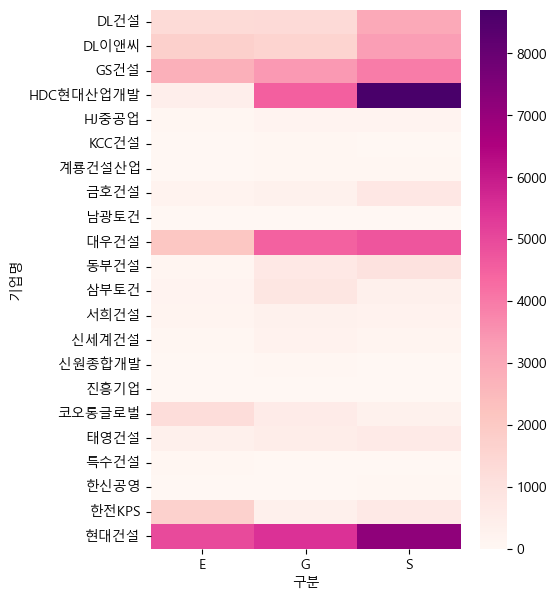

In [10]:
import seaborn as sns
plt.figure(figsize=(5, 7))
sen = pd.pivot_table(sentences, values='문장', index =['기업명'], columns=['구분'], aggfunc='count', fill_value = 0)
sns.heatmap(sen, cmap='RdPu')
plt.show()

### 문장 워드클라우드

In [11]:
import re

# MeCab으로 형태소 분석 & 품사 태그
from konlpy.tag import Mecab
mecab = Mecab(dicpath="C:\mecab\mecab-ko-dic")

# 형태소와 품사를 추출하는 함수
def morphs_and_pos(text):
    result = mecab.pos(text)
    return result

# 필요한 단어만 추출하는 함수
def extract_category(ls):
    Pos = ['NNP', 'NNG'] # 고유명사, 일반명사
    stopWord = ['산업', '특성','개별', '사진', '그룹', '아이', '뉴스', '서온', '기자', '내년', '동시', '분야', '공식', '블록', '세상', '형상', '무단', '가운데', '대표', '이사',
                '지하', '지상', '무단', '전재', '배포', '금지', '일반', '경우', '기업', '당시', '지난해', '전년', '대비','자체', '최근', '한국', '전용', '면적', '데일리', '스타', '네이버', '채널', '구독', '재밌', 'TV', '영상', '바로', '수록',
                '조간', '브리핑', '신문', '이번', '오늘', '인사이트', '이달', '부문', '지구', '연내', '계속', '클럽'] # 불용어
    lst = []

    for wrd in ls:
        if len(wrd[0]) > 1:
            if wrd[1] in Pos: # 명사만 추출
                if wrd[0] not in stopWord: # 불용어 제거
                    lst.append(wrd[0])
    return lst

# 토큰 열 만들기
import ast
def make_tokens(row):
    result_tokens = []  # 빈 리스트 초기화
    tokens = ' '.join(extract_category(row))
    result_tokens.append(tokens)  # 각 토큰 리스트를 결과 리스트에 추가
    return result_tokens  # 각 토큰 리스트를 반환


sentences['품사'] = sentences['문장'].apply(morphs_and_pos)
sentences['토큰'] = sentences['품사'].apply(make_tokens)


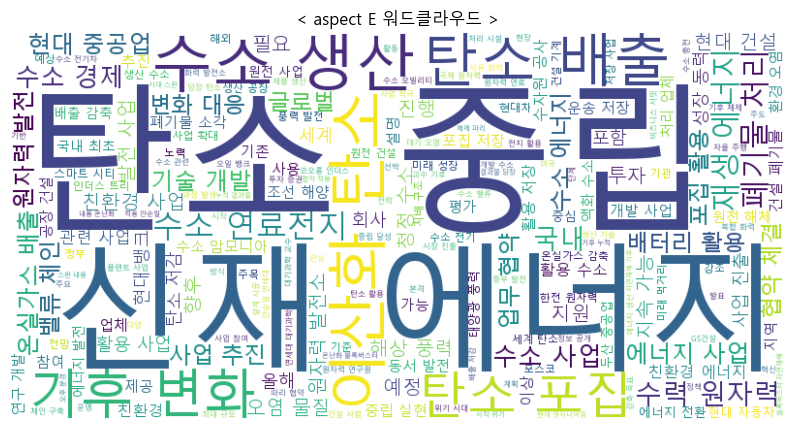

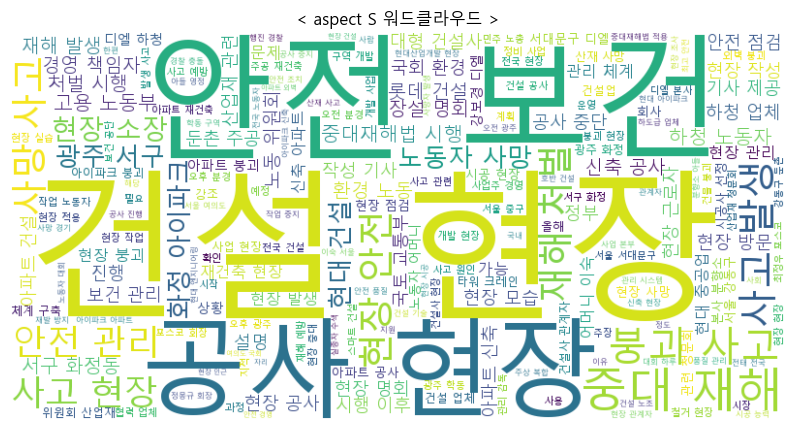

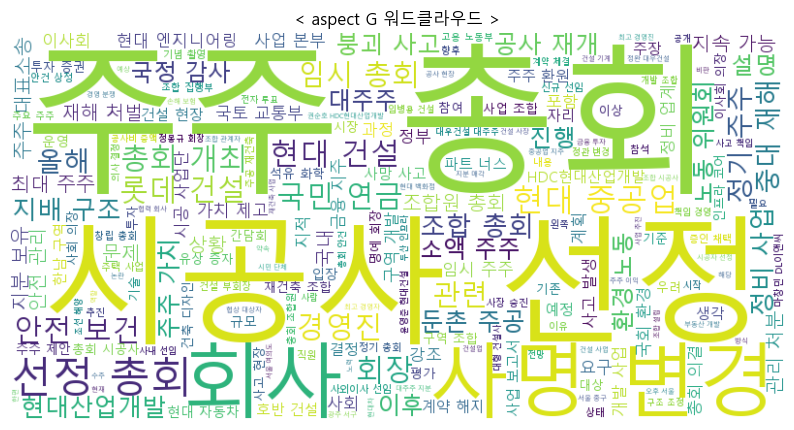

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

categories = ['E', 'S', 'G']

# 반복문을 사용하여 각 카테고리에 대한 워드클라우드 생성
for category in categories:
    df = sentences[sentences['구분'] == category]

    all_nouns_list = [noun for nouns_list in df['토큰'] for noun in nouns_list]
    all_nouns_str = ' '.join(all_nouns_list)

    stopwords = []

    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, stopwords=stopwords).generate(all_nouns_str)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'< aspect {category} 워드클라우드 >')
    plt.show()
